<a href="https://colab.research.google.com/github/DiwashPaudel/DiwashPaudel/blob/main/S00393611_Diwash_Paudel_ITEC610_AT3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ASSESSMENT 3**

#Task 1

Step 1: Import necessary libraries

In [ ]:
# Importing libraries for data analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from google.colab import files


Step 2: Load dataset


In [ ]:
# uploading the dataset 'brfss.csv' to Google Colab environment.
# After uploading, you can use the following code to load it into a DataFrame.
#its not neccesity we can upload from file as well
#uploaded = files.upload()

# Read the uploaded CSV file
df = pd.read_csv('sample_data/ITEC610_assessment3_data.csv')

Step 3: Displaying first few rows to understand the data


In [ ]:
print(df.head())

   Unnamed: 0   age     weight2     wtyrago   wtkg2   htm3  sex
0           0  39.0   88.636364   88.636364   88.64  180.0  1.0
1           1  64.0   75.000000   84.545455   75.00  155.0  2.0
2           2  87.0   61.818182   63.636364   61.82    NaN  2.0
3           3  51.0  100.000000  100.000000  100.00  183.0  1.0
4           4  35.0   63.636364   61.363636   63.64  170.0  2.0


Step 4: Data Cleaning and Correction

In [ ]:
# Check for missing values
print(df.isnull().sum())
## Removing unnecessary index column since it is unnamed on the file
df.drop(columns=['Unnamed: 0'], inplace=True)

# Handling a missing values
#df.dropna(inplace=True)  #I am dropping rows with missing values.
df.dropna(subset=['weight2', 'wtyrago', 'wtkg2', 'htm3'], inplace=True)

Unnamed: 0       0
age            645
weight2       2701
wtyrago       4061
wtkg2         2701
htm3          1230
sex              1
dtype: int64


Step 5: Data Wrangling

In [ ]:
# Encode sex as 'Male' and 'Female' for better readability
df['sex'] = df['sex'].replace({1: 'Male', 2: 'Female'})
print(df.head())

    age     weight2     wtyrago   wtkg2   htm3     sex
0  39.0   88.636364   88.636364   88.64  180.0    Male
1  64.0   75.000000   84.545455   75.00  155.0  Female
3  51.0  100.000000  100.000000  100.00  183.0    Male
4  35.0   63.636364   61.363636   63.64  170.0  Female
5  62.0   70.454545   70.454545   70.45  173.0  Female


Step 6: Exploratory Data Analysis (EDA)



In [ ]:
# Producing summary statistics for Current Weight, Weight a Year Ago, and Height
summary_stats = df[['weight2', 'wtyrago', 'htm3']].describe()

# Extracting relevant statistics
min_vals = summary_stats.loc['min'].values
max_vals = summary_stats.loc['max'].values
mean_vals = summary_stats.loc['mean'].values
std_vals = summary_stats.loc['std'].values
median_vals = summary_stats.loc['50%'].values
percentile_25 = summary_stats.loc['25%'].values
percentile_75 = summary_stats.loc['75%'].values
print("Summary Statistics:\n", summary_stats)

Summary Statistics:
             weight2       wtyrago          htm3
count  67339.000000  67339.000000  67339.000000
mean      78.143398     78.876651    168.994401
std       19.245416     20.333939     10.438455
min       22.727273     22.727273     61.000000
25%       63.636364     63.636364    163.000000
50%       75.454545     76.363636    168.000000
75%       88.636364     90.909091    178.000000
max      265.909091    266.363636    229.000000


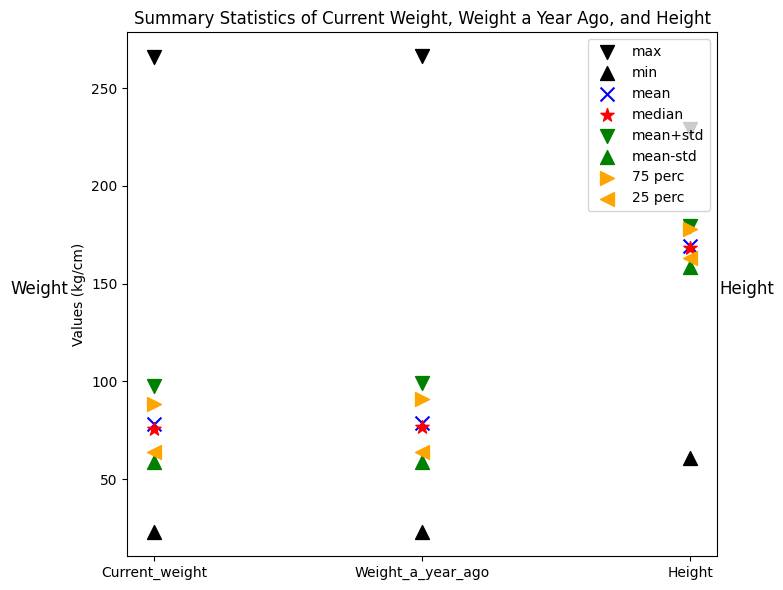

In [ ]:
# Plotting the summary statistics as a boxplot
# Defining X axis labels
categories = ['Current_weight', 'Weight_a_year_ago', 'Height']
#Plotting the summary statistics graph
plt.figure(figsize=(8, 6))
# Plotting each statistic
plt.scatter(categories, max_vals, marker='v', color='black', label='max', s=100)
plt.scatter(categories, min_vals, marker='^', color='black', label='min', s=100)
plt.scatter(categories, mean_vals, marker='x', color='blue', label='mean', s=100)
plt.scatter(categories, median_vals, marker='*', color='red', label='median', s=100)
plt.scatter(categories, mean_vals + std_vals, marker='v', color='green', label='mean+std', s=100)
plt.scatter(categories, mean_vals - std_vals, marker='^', color='green', label='mean-std', s=100)
plt.scatter(categories, percentile_75, marker='>', color='orange', label='75 perc', s=100)
plt.scatter(categories, percentile_25, marker='<', color='orange', label='25 perc', s=100)
# Adding the legend in the top-right
plt.legend(loc='upper right')
# Adding labels and title
plt.title("Summary Statistics of Current Weight, Weight a Year Ago, and Height")
# Adding custom labels outside the plot
plt.annotate('Weight', xy=(-0.15, 0.5), xycoords='axes fraction', fontsize=12, ha='center', rotation=0)
plt.annotate('Height', xy=(1.05, 0.5), xycoords='axes fraction', fontsize=12, ha='center', rotation=0)

# Label for the Y-axis
plt.ylabel("Values (kg/cm)")
# Tight layout to prevent label overlap
plt.tight_layout()

# Display the plot
plt.show()

#Task 2

Step 7: Correlation analysis

In [ ]:
# Creating a new column 'weight_change'
df['weight_change'] = df['weight2'] - df['wtyrago']
# Calculate correlation between weight_change and other variables
correlation_matrix = df[['weight_change', 'weight2', 'wtyrago', 'age']].corr()
print("\nCorrelation Matrix:\n", correlation_matrix)


Correlation Matrix:
                weight_change   weight2   wtyrago       age
weight_change       1.000000  0.028366 -0.323665 -0.067879
weight2             0.028366  1.000000  0.936610 -0.077757
wtyrago            -0.323665  0.936610  1.000000 -0.049808
age                -0.067879 -0.077757 -0.049808  1.000000


Step 8:Visualization of Summary Statistics Graph Using Boxplot

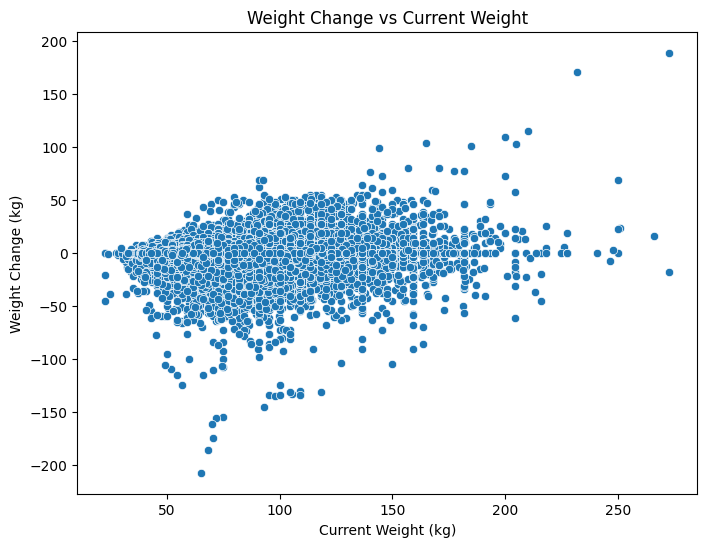

In [ ]:
# Scatter plot for weight_change vs current_weight
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='weight2', y='weight_change')
plt.title('Weight Change vs Current Weight')
plt.xlabel('Current Weight (kg)')
plt.ylabel('Weight Change (kg)')
plt.show()

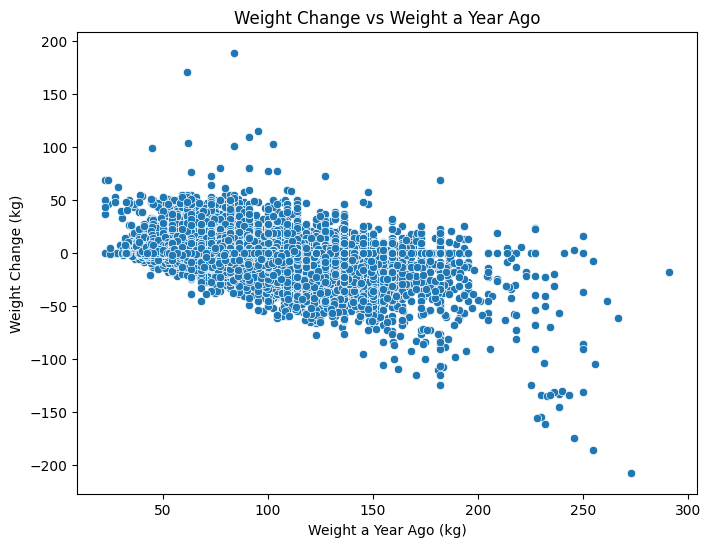

In [ ]:
# Scatter plot for weight_change vs weight_a_year_ago
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='wtyrago', y='weight_change')
plt.title('Weight Change vs Weight a Year Ago')
plt.xlabel('Weight a Year Ago (kg)')
plt.ylabel('Weight Change (kg)')
plt.show()

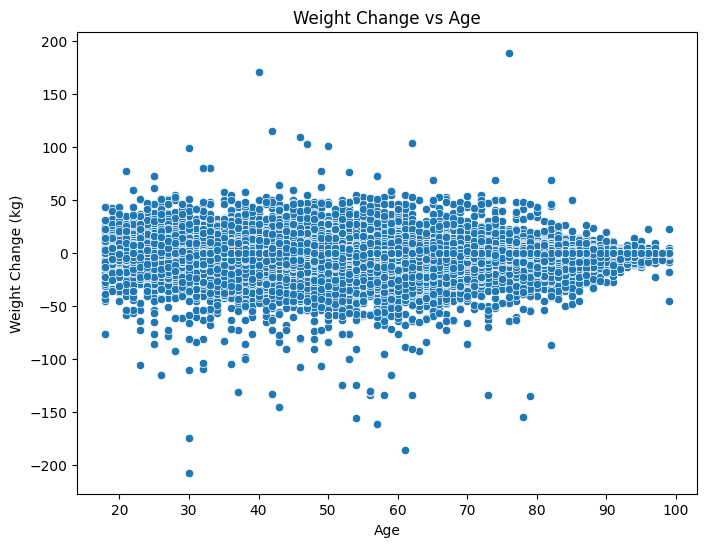

In [ ]:
# Scatter plot for weight_change vs age
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='age', y='weight_change')
plt.title('Weight Change vs Age')
plt.xlabel('Age')
plt.ylabel('Weight Change (kg)')
plt.show()

#Task 3

Step 9: Predictive Modeling using scikit-learn

In [22]:
# Simple Linear Regression for predicting house prices based on size (Task 3)
house_sizes = np.array([[1500], [2000], [2500], [3000], [3500]])
house_prices = np.array([250000, 300000, 330000, 360000, 390000])

# Creating the model
model = LinearRegression()

# Fitting the model
model.fit(house_sizes, house_prices)

# Predicting the price for a 2500 sqft house
predicted_price = model.predict([[2500]])
print(f'The predicted price for a 2500 sqft house is: ${predicted_price[0]:,.2f}')


The predicted price for a 2500 sqft house is: $326,000.00


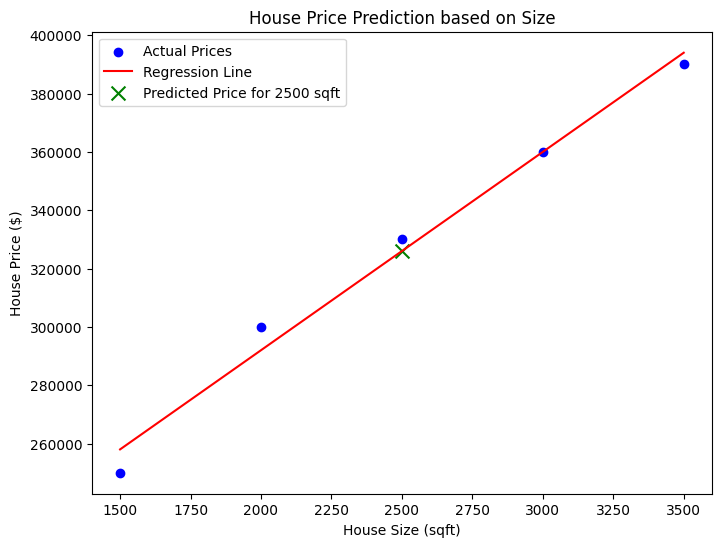

In [23]:
#scater plot for the predictive modeling

# Data for house sizes and prices
house_sizes = np.array([[1500], [2000], [2500], [3000], [3500]])
house_prices = np.array([250000, 300000, 330000, 360000, 390000])

# Creating and fitting the linear regression model
model = LinearRegression()
model.fit(house_sizes, house_prices)

# Predicting prices for the existing house sizes to plot the regression line
predicted_prices = model.predict(house_sizes)

# Plotting the scatter plot and regression line
plt.figure(figsize=(8, 6))
plt.scatter(house_sizes, house_prices, color='blue', label="Actual Prices")
plt.plot(house_sizes, predicted_prices, color='red', label="Regression Line")
plt.scatter(2500, model.predict([[2500]]), color='green', marker='x', s=100, label="Predicted Price for 2500 sqft")

# Adding labels and title
plt.xlabel("House Size (sqft)")
plt.ylabel("House Price ($)")
plt.title("House Price Prediction based on Size")
plt.legend()

# Show the plot
plt.show()
